In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("spam.csv", encoding=('iso-8859-1'))

In [2]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* Data Cleaning 
* EDA
* Text preprocessing
* model building 
* evaluation 
* improvement
* Website
* Deployment

### **Data Cleaning**


In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3070,ham,Apart from the one i told you about yesterday?,NaN,NaN,NaN
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,NaN,NaN,NaN
5009,ham,"By the way, 'rencontre' is to meet again. Moun...",NaN,NaN,NaN
943,ham,And also I've sorta blown him off a couple tim...,NaN,NaN,NaN
3077,ham,Okay but i thought you were the expert,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# let's remove useless data
data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.sample(5)

,v1,v2
5409,ham,There is a first time for everything :)
5174,ham,Water logging in desert. Geoenvironmental impl...
1351,ham,Yo theres no class tmrw right?
109,ham,Dont worry. I guess he's busy.
1605,ham,When you came to hostel.


In [8]:
#let's rename columns
data.rename(columns={'v1':'Targets', 'v2':'Text'}, inplace=True)
data.head()

,Targets,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
## for converting labels into 0 or 1 
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data.Targets= encoder.fit_transform(data['Targets'])

In [10]:
# Null Values
data.isnull().sum()

Targets    0
Text       0
dtype: int64

In [11]:
## Duplicate values
data.duplicated().sum()

403

In [12]:
## let's remove these values
data.drop_duplicates(keep='first')

,Targets,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA 

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


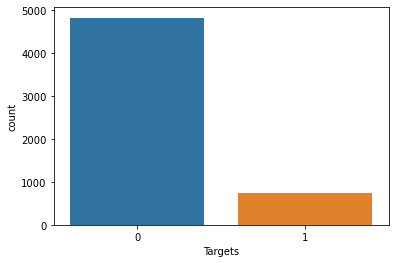

In [13]:
# let's check the percentage of spam or ham
import seaborn as sns
sns.countplot(data.Targets)
plt.show()

In [14]:
#let's count the number of characters
data['char']= data['Text'].apply(len)

In [15]:
data.head()

,Targets,Text,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
## for counting words 
import nltk
# nltk.download('punkt')

data['Words count']= data['Text'].apply(lambda x:len( nltk.word_tokenize(x)))

In [17]:
data['Sentences count']= data['Text'].apply(lambda x:len( nltk.sent_tokenize(x)))
data.head(15)

,Targets,Text,char,Words count,Sentences count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [18]:
# data.iloc[:, 2:].describe()
ham = data[data['Targets']==0][['char', 'Words count', 'Sentences count']]
spam =  data[data['Targets']==1][['char', 'Words count', 'Sentences count']]

<AxesSubplot:ylabel='Count'>

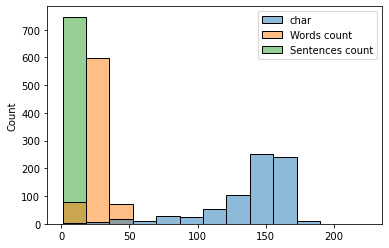

In [19]:
sns.histplot(spam)

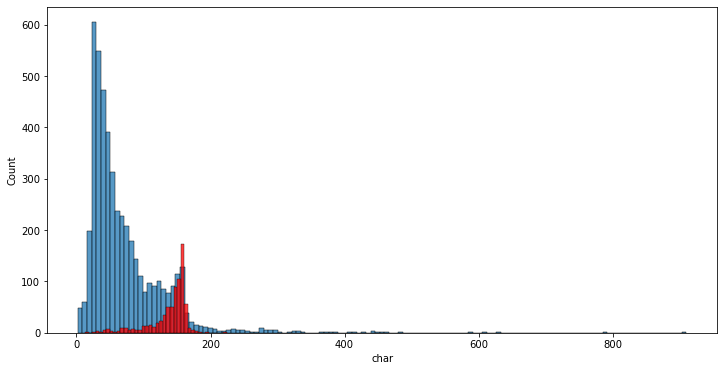

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(ham['char'])
sns.histplot(spam['char'], color ='r')
plt.show()

* as we can see in spam, the no of charaters are less 

<AxesSubplot:>

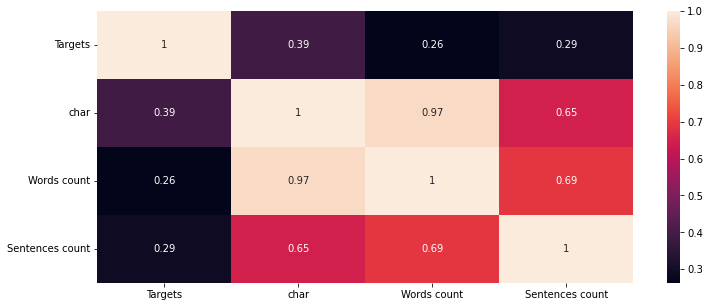

In [21]:
# now let's make an correlation 
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True)

## Data Preprocessing 
##### in DP we perform these tasks
* Lower case
* Tokenization
* removal of special characters
* removing stop words and punctuation
* stemming  

In [22]:
def Transform_text(text):
   T = text.lower()
   T = nltk.word_tokenize(text)
   ## for removing special charaters 
   l=[]
   for i in text:
      if i.isalnum(): ## just alphabet and numbers are allowed
         l.append(i)
   
   return l

In [23]:
Transform_text("HI my name && is Abu-Ubaida")

['H',
 'I',
 'm',
 'y',
 'n',
 'a',
 'm',
 'e',
 'i',
 's',
 'A',
 'b',
 'u',
 'U',
 'b',
 'a',
 'i',
 'd',
 'a']

In [24]:
#  stop word are the words which don't put any value into our prediction like is, the etc. for this we will use 

from nltk.corpus import stopwords
# nltk.download('stopwords') 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

* these are the stops words

In [25]:
# for punctuation 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def Transform_text(text):
   T = text.lower()
   T = nltk.word_tokenize(text)

   ## for removing special characters 
   List=[]   # to store all char
   for i in T:
      if i.isalnum(): ## just alphabet and numbers are allowed
         List.append(i)
   T = List[:] ## as list is immutable so will have to copy like this or .copy()
   List.clear() # to use it again
   
   ## let's check for other conditions 
   for i in T:
      if i not in stopwords.words('english') and i not in string.punctuation:
         List.append(i)

   return List

In [27]:
Transform_text("HI my  name is %% the was the if yousuf are  Abu Uabdsfa")

['HI', 'name', 'yousuf', 'Abu', 'Uabdsfa']

In [28]:
## Stemming, here we just get the dictionary form of word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing") # like 


'danc'

In [29]:
# dir(PorterStemmer())

In [30]:
def Transform_text(text):
   T = text.lower()  
   T = nltk.word_tokenize(text) ## for getting single single words

   ## for removing special characters 
   List=[]   # to store all char
   for i in T:
      if i.isalnum(): ## just alphabet and numbers are allowed
         List.append(i)
   T = List[:] ## as list is immutable so will have to copy like this or .copy()
   List.clear() # to use it again
   
   ## let's check for other conditions 
   for i in T:
      if i not in stopwords.words('english') and i not in string.punctuation:
         List.append(i)
   text = List[:]; List.clear()

   ## for stemming 
   for i in text:
      List.append(ps.stem(i))
   return " ".join(List)  ## to get as a string of list

In [31]:
Transform_text("HI dearing &&ed  my iS name hiii ? what is your Nmae ")

'hi dear ed is name hiii nmae'

In [32]:
## let's check our function will real data 
a = data['Text'][0]
print(a, end='\n\n')
Transform_text(a)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
## As we wanted to get the Transform list
data['Transformed_text'] = data['Text'].apply(Transform_text)

In [34]:
data.head()

,Targets,Text,char,Words count,Sentences count,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


* Now let's make and word image from wordcloud library of Tranformed_text. This is how we see the most frequent word in the list.m

### Image graph

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = 'white')

In [36]:
spam = wc.generate(data[data['Targets']==1]['Transformed_text'].str.cat(sep=" "))

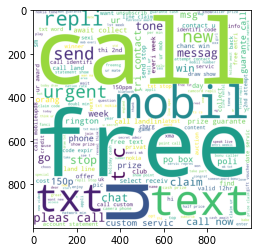

In [37]:
## to see the image or graph.figure(figsize=(15,10))
plt.imshow(spam)

In [38]:
## for ham messages
ham = wc.generate(data[data['Targets']==0]['Transformed_text'].str.cat(sep=" "))

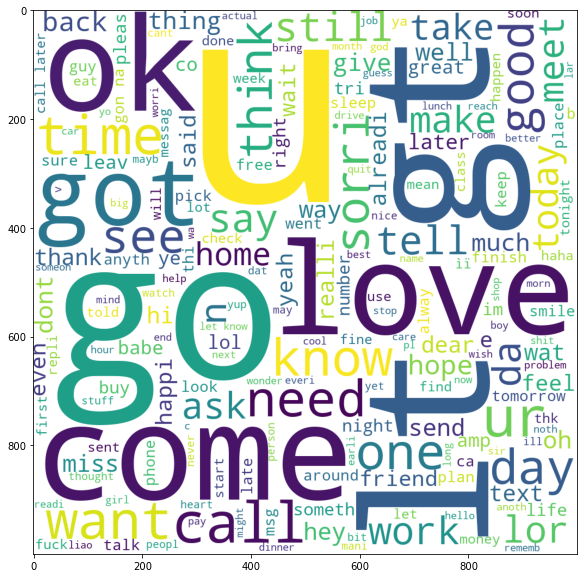

In [39]:
## to see the image or graph
plt.figure(figsize=(15,10))
plt.imshow(ham)

## for finding the most 30% words in the text, here we go 


In [40]:
record=[]
for msg in data[data['Targets']==1]['Transformed_text'].tolist():
   for word in msg.split():
      record.append(word)

In [41]:
len(record)
record

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'i',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'as',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'had',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 'from',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'you',
 '1',
 'week',
 'free',
 'membership',
 '

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


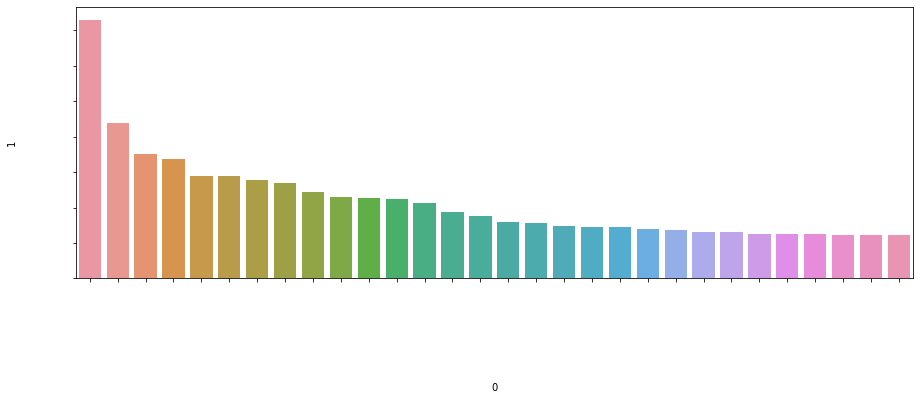

In [42]:
from collections import Counter
a= Counter(record).most_common(30)
df = pd.DataFrame(a)

## plotting 
plt.figure(figsize=(15,5))
plt.xticks(color = 'w', size=25, rotation=90)
plt.yticks(color = 'w', size=25)
sns.barplot(df[0], df[1])
plt.show()

## for Ham

In [43]:
record_ham=[]
for msg in data[data['Targets']==0]['Transformed_text'].tolist():
   for word in msg.split():
      record_ham.append(word)

c:\Users\Abu Ubaida\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


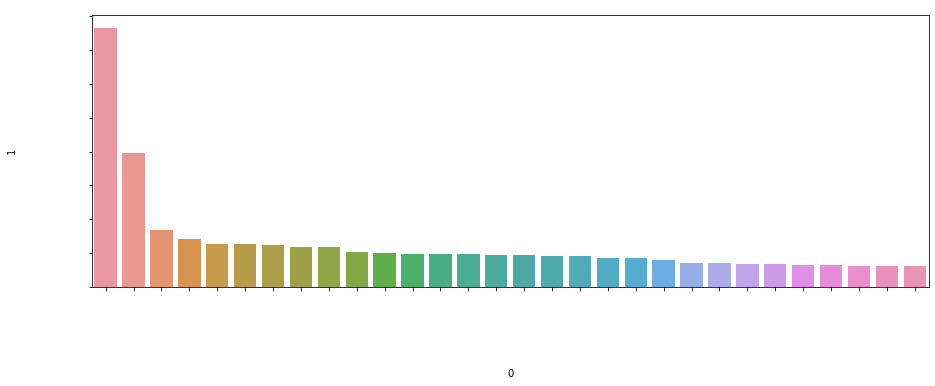

In [44]:
from collections import Counter
a= Counter(record_ham).most_common(30)
df1 = pd.DataFrame(a)
# df1


## plotting 
plt.figure(figsize=(15,5))
plt.xticks(color = 'w', size=25, rotation=90)
plt.yticks(color = 'w', size=25)
sns.barplot(df1[0], df1[1])
plt.show()

## Model Building 

In [45]:
## as we know that our model does'nt accepts text as a input, so now we will convert this text into vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(data['Transformed_text']).toarray()
X.shape

(5572, 6826)

In [46]:
y = data['Targets'].values
y.shape

(5572,)

In [47]:
## models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = gnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[855 102]
 [ 27 131]]
Precison Score 0.5622317596566524
Accuracy_score 0.884304932735426


In [50]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = bnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Bernoulli NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Bernoulli NB

confusion Matrix [[956   1]
 [ 30 128]]
Precison Score 0.9922480620155039
Accuracy_score 0.9721973094170404


In [51]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = mnb.fit(X_train, y_train)
pred1 = model.predict(X_test)

print("Multinomial NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))

## here percison Score matters alot, as it's a unbalance Data

Multinomial NB

confusion Matrix [[941  16]
 [ 15 143]]
Precison Score 0.89937106918239
Accuracy_score 0.9721973094170404


#### Let's make Tfidf Vectorizer 


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf  = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(data['Transformed_text']).toarray()
X.shape

(5572, 3000)

In [53]:
y = data['Targets'].values


In [54]:
## models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = gnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[847 110]
 [ 34 124]]
Precison Score 0.5299145299145299
Accuracy_score 0.8708520179372198


In [57]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = bnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[955   2]
 [ 25 133]]
Precison Score 0.9851851851851852
Accuracy_score 0.9757847533632287


In [58]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
model = mnb.fit(X_train, y_train)
pred1 = model.predict(X_test)
print("Gaussion NB\n")
print('confusion Matrix',confusion_matrix(y_test, pred1))
print("Precison Score", precision_score(y_test, pred1))
print("Accuracy_score",accuracy_score(y_test, pred1))


Gaussion NB

confusion Matrix [[956   1]
 [ 37 121]]
Precison Score 0.9918032786885246
Accuracy_score 0.9659192825112107


## decision 
* as we know the data is unbalance so precision Score matters alot than accuracy so we will go with MultinomialNB

In [59]:
## Let's check other algorithms

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
irc = LogisticRegression(solver='liblinear', random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)

In [62]:
clfs= {'SVC':svc, 'KNC':knc, "MNB":mnb, "DTC":dtc, 'IRC':irc, 'RFC':rfc,"ABC":abc, "BC":bc, "ETC":etc, "GBDT":gbdt}

In [63]:
## let's make function which will get algo and will return precision and accuracy score
def tell_about_algo(algo):
   model=algo.fit(X_train, y_train)
   prediction = model.predict(X_test)
   accuracy = accuracy_score(y_test, prediction)
   precision = precision_score(y_test, prediction)

   return accuracy, precision

In [64]:
tell_about_algo(svc)

(0.9730941704035875, 0.9848484848484849)

In [65]:
acc =[]
prc =[]
for values in clfs.values():
   accuracy, precision = tell_about_algo(values)
   acc.append(accuracy)
   prc.append(precision)

df = pd.DataFrame({"Algorithms":clfs.keys(), "Accuracy":acc, "precision":prc })
df

,Algorithms,Accuracy,precision
0,SVC,0.973094,0.984848
1,KNC,0.907623,1.000000
2,MNB,0.965919,0.991803
3,DTC,0.925561,0.894737
4,IRC,0.956951,0.991071
5,RFC,0.962332,0.983333
6,ABC,0.959641,0.966942
7,BC,0.958744,0.917910
8,ETC,0.972197,1.000000
9,GBDT,0.934529,0.929293


In [66]:
df.sort_values(by='precision', ascending=False)

,Algorithms,Accuracy,precision
1,KNC,0.907623,1.000000
8,ETC,0.972197,1.000000
2,MNB,0.965919,0.991803
4,IRC,0.956951,0.991071
0,SVC,0.973094,0.984848
5,RFC,0.962332,0.983333
6,ABC,0.959641,0.966942
9,GBDT,0.934529,0.929293
7,BC,0.958744,0.917910
3,DTC,0.925561,0.894737


**So finally we are choosing MNB as our model, let's create pipeline for our website**

**Here we have just 3 steps, Transfomation of Text, Vectorizing, and applying Algorithms**

In [67]:
## let's save these models as files 
import pickle
pickle.dump(tf, open("Vectorizer.pkl", 'wb'))
pickle.dump(mnb, open("model.pkl", 'wb'))
pickle.dump(Transform_text, open("preprocessing.pkl", 'wb'))